In [1]:
from file_cache import *

2020-07-21 12:55:16,999 util_log.py[153] INFO Start the program at:amax7, 127.0.1.1, with:Load module


File_cache: Adjust notebook work fold to:/share/felix/pj/thyroid_seg/


In [2]:
 
import itertools
import numpy as np
from easydict import EasyDict as edict

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [3]:
from file_cache import *

img_file_list = glob('/home/felix/pj/thyroid_seg/input/TNSCUI2020_train/image/*.PNG', recursive=True)

df = pd.DataFrame({'img_file':img_file_list})

df['label_path'] = df.img_file.apply(lambda val: val.replace('image', 'mask'))
df['sn'] = df.img_file.apply(lambda val: os.path.basename(val).split('.')[0]  ).astype(int)
df['ID'] = df.img_file.apply(lambda val: os.path.basename(val)) 
df = df.sort_values('sn')


np.random.seed(2007)
df['fold'] = np.random.randint(0, 5, len(df))
df['valid'] = df.fold ==4

#df['valid'] = df.sn%5 >=4
df.head()

df['size1'] = df.label_path.apply(lambda val: cv2.imread(val).shape[0])
df['size2'] = df.label_path.apply(lambda val: cv2.imread(val).shape[1])
df.sort_values('size1')

codes = list(range(2))
print('codes', list(codes) )

df_cat = pd.read_csv('/home/felix/pj/thyroid_seg/input/TNSCUI2020_train/train.csv')
print(df_cat.shape)
df_cat.head()

df = df.merge(df_cat, on=['ID'])
df.head()

codes [0, 1]
(3644, 2)


,img_file,label_path,sn,ID,fold,valid,size1,size2,CATE
0,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,2,2.PNG,3,False,477,610,0
1,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,4,4.PNG,1,False,479,506,0
2,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,6,6.PNG,0,False,600,542,0
3,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,8,8.PNG,0,False,600,466,0
4,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,12,12.PNG,1,False,603,573,0


In [4]:
df.groupby(['valid', 'CATE']).sn.count()

valid  CATE
False  0       1297
       1       1590
True   0        344
       1        413
Name: sn, dtype: int64

In [5]:
# from file_cache import *

# df = pd.DataFrame({'path':glob('/share/data2/covid_wuhan/Wuhan_*/**/*.png', recursive=True)})

# df['p_cnt'] = df.path.apply(lambda val: val.split('_')[-1].split('.')[0]).astype(int)
# df['class_'] = df.path.apply(lambda val: 'NCP' if '_COVID' in val else 'Normal')

# df['hash'] =  df.path.apply(lambda val:  val.split('.')[-3])

# df['test'] = True
# df = df.loc[df.class_!='CP']
# df = df.loc[df.p_cnt>=20000]
# #df = df.loc[df.path.apply(lambda val: val.split('_')[-6][-1] ).astype(int)<=1]
# df['src'] = 'wuhan'

# df.head()


# #df = pd.concat([df1,df2])
# df['target'] = df['class_'].astype('category').cat.codes
 
# print(df['class_'].value_counts())


# df_wuhan = df.copy()
# df_wuhan.head()

In [6]:
# from file_cache import *

# df = pd.DataFrame({'path':glob('/share/data2/covid_CCII/*/**/*.png', recursive=True)})

# df['p_cnt'] = df.path.apply(lambda val: val.split('_')[-2] ).astype(int)
# df['class_'] = df.path.apply(lambda val: val.split('/')[-4])
# df  = df.loc[df.class_ != 'CP']

# df['hash'] =  df.path.apply(lambda val:  val.split('/')[-3])

# df['valid'] = True
# df = df.loc[df.class_!='CP']
# df = df.loc[df.p_cnt>=20000]
# # #df = df.loc[df.path.apply(lambda val: val.split('_')[-6][-1] ).astype(int)<=1]
# # df['valid'] = df.path.apply(lambda val: val.split('_')[-6][-1] ).astype(int)<=1
# # #df2 = df
# df['src'] = 'ccii'

# print(df['class_'].value_counts())
# df_ccii = df.copy()
# df.head()


# # #df = pd.concat([df1,df2])
# # df['target'] = df['class_'].astype('category').cat.codes
# # df = df.loc[df.path.str.contains('_Tonji_')]
# # df = df.sample(frac=1)
# # df.valid.value_counts()

In [7]:
# from file_cache import *

# df = pd.DataFrame({'path':glob('/share/data2/covid_img/v13/images/*/**/*.png', recursive=True)})


# def check_type(val):
#     if '_normal_' in val:
#         return 'Normal'
#     elif '_covid_' in val :
#         return 'NCP'
# #     elif '_pneumonia_' in val:
# #         return 'pneumonia'
#     else:
#         return 'other'

# df['valid'] = False
# df['class_'] = df.path.apply(lambda val: check_type(val))

# df['p_cnt'] = df.path.apply(lambda val: val.split('_')[-1][1:-4] ).astype(int)

# df['src'] = 'v13'
# df  = df.loc[df.class_ != 'other']

# # df['hash'] =  df.path.apply(lambda val:  val.split('/')[-3])

# # df['valid'] = True
# # df = df.loc[df.class_!='CP']
# #df = df.loc[df.p_cnt>=20000]
# print(df['class_'].value_counts()) 
 
# df_v13 = df.copy()

In [8]:
# df = pd.concat([df_v13, df_ccii, df_wuhan])
# df.head()

In [9]:
# df.groupby(['src', 'class_']).path.count()

In [10]:
# file = df.loc[df.path.str.contains('Tonji_NonCOVID/')].path.sample(frac=1).iloc[0]
# print(file)
# plt.imshow(plt.imread(file))
# plt.show()
# plt.hist(cv2.imread(file).flatten(),bins=100 )
# pass

In [11]:
# file = df.loc[df.path.str.contains('Tonji_COVID/')].path.sample(frac=1).iloc[0]
# print(file)
# plt.imshow(plt.imread(file))
# plt.show()
# plt.hist(cv2.imread(file).flatten(),bins=100 )
# pass

In [12]:
# file = df.loc[df.valid==True].path.sample(frac=1).iloc[0] 
# print(file)
# plt.imshow(plt.imread(file))
# plt.show()
# plt.hist(cv2.imread(file).flatten(),bins=100 )
# pass

In [13]:
# df.class_.value_counts()

In [14]:
# df_yqh = pd.read_csv('/share/data2/yqh/COVID_v4.0/data_new/COVID_cls2.csv')
# df_yqh.subset.value_counts()

# #'people_idx', 'hash_id', 'img_dir', 'label', 'label_name', 'subset'
# df_yqh['path'] = df_yqh.img_dir
# df_yqh = df_yqh.loc[df_yqh.subset!='test']
# print(df_yqh.subset.value_counts())
# df_yqh['valid'] = df_yqh.subset == 'valid' 
# df_yqh['target'] = df_yqh['label']

# print(df_yqh.valid.value_counts())

In [15]:
df.head()

,img_file,label_path,sn,ID,fold,valid,size1,size2,CATE
0,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,2,2.PNG,3,False,477,610,0
1,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,4,4.PNG,1,False,479,506,0
2,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,6,6.PNG,0,False,600,542,0
3,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,8,8.PNG,0,False,600,466,0
4,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,12,12.PNG,1,False,603,573,0


You can deactivate this warning by passing `no_check=True`.


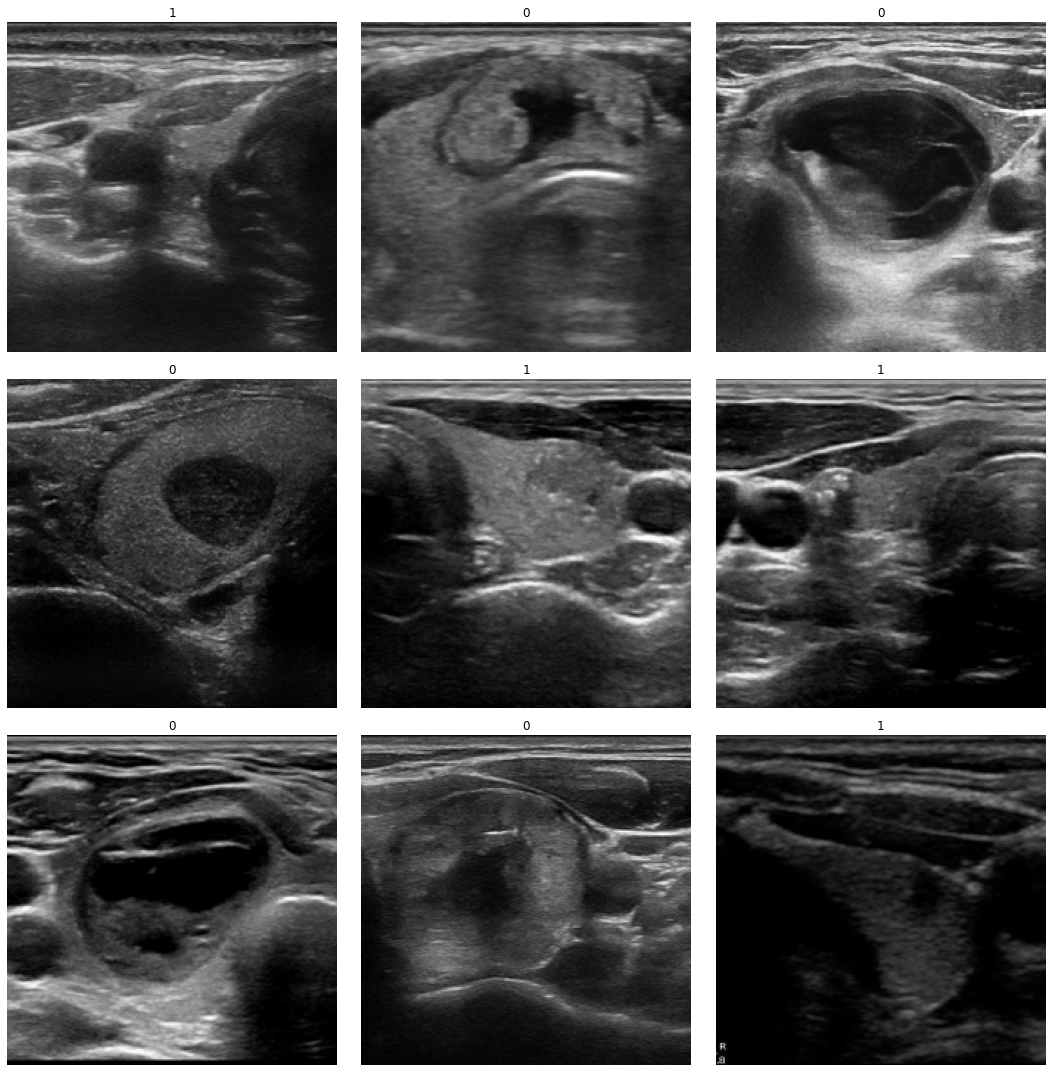

In [16]:
# df = pd.read_csv(path/'cleaned.csv', header='infer')
# print(df.head())

#https://gilberttanner.com/blog/fastai-image-classification


# %reload_ext autoreload
# %autoreload 2
from fastai import *
from fastai.vision import *
from fastai.widgets import *
# df = pd.read_csv('./input/train.csv', names=['file_name', 'label'])
# df['fold'] = df.file_name%5
# df['file_name'] = df.file_name.astype('str')+'.jpg'

# print(df.head(), df.shape)
# #df.label = np.where(df.label>=1, 1, 0)


# print(df.label.value_counts().sort_index())

# print(df.shape)
# tfms = get_transforms(do_flip=False)

#valid_fold = 4
#df_train_valid = pd.concat([df_ccii, df_v13])[['path', 'valid', 'class_']]
data = (ImageDataBunch.from_df(df=df, fn_col='img_file', path='/', valid_pct=0)
                    #.split_by_rand_pct(0.2)
                    .split_from_df(col='valid')
                   .label_from_df('CATE')
                   .transform(None, size=224)
                   .databunch(bs=64)).normalize(imagenet_stats)

test_data = ImageList.from_folder(path="/share/data2/body/thyroid/test/image")
data.add_test(test_data)

data.show_batch(rows=3, figsize=(15,15))


In [17]:
df

,img_file,label_path,sn,ID,fold,valid,size1,size2,CATE
0,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,2,2.PNG,3,False,477,610,0
1,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,4,4.PNG,1,False,479,506,0
2,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,6,6.PNG,0,False,600,542,0
3,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,8,8.PNG,0,False,600,466,0
4,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,12,12.PNG,1,False,603,573,0
...,...,...,...,...,...,...,...,...,...
3639,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,9757,9757.PNG,0,False,607,960,1
3640,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,9759,9759.PNG,1,False,753,761,1
3641,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,9763,9763.PNG,4,True,244,504,1
3642,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,/home/felix/pj/thyroid_seg/input/TNSCUI2020_tr...,9766,9766.PNG,2,False,330,504,1


In [18]:
len(data.train_ds), len(data.valid_ds), len(data.test_ds)

(2887, 757, 910)

In [19]:
# def fbeta(y_pred:Tensor, y_true:Tensor, thresh:float=0.2, beta:float=2, eps:float=1e-9, sigmoid:bool=True)->Rank0Tensor:
#     "Computes the f_beta between `preds` and `targets`"
#     beta2 = beta ** 2
#     if sigmoid: y_pred = y_pred.sigmoid()
#     y_pred = (y_pred>thresh).float()
#     y_true = y_true.float()
    
#     print('y_pred.shape,y_true.shape', y_pred.shape,y_true.shape )
#     print('(y_pred*y_true)', y_pred*y_true)
#     TP = (y_pred*y_true).sum(dim=1)
#     print('TP', TP)
#     prec = TP/(y_pred.sum(dim=1)+eps)
#     rec = TP/(y_true.sum(dim=1)+eps)
#     res = (prec*rec)/(prec*beta2+rec+eps)*(1+beta2)
#     return res.mean()

def f1_score(logits, targets, position_index=1):
    _, predict = torch.max(logits, dim=1)
    #print(logits.shape, targets.shape, predict.size(), type(logits), type(targets))
    from fastai.metrics import fbeta
    #print(predict.size(), targets.size(), predict, targets) 
    from sklearn.metrics import f1_score
    #print('targets.cpu().numpy(), predict.cpu().numpy()', targets.cpu().numpy()[:3], predict.cpu().numpy()[:3])
    f1 = f1_score(targets.cpu().numpy(), predict.cpu().numpy())
    return torch.as_tensor(f1)
    #return fbeta(predict.view(1, -1),targets.view(1, -1),beta=1, eps=1e-9, sigmoid=False ) 


#

# preds = tensor([0.6, 0.8, 0.2, 0.4, 0.9]).view(1, 5) # TP =2, FP = 1, FN = 1
# ys = tensor([1, 0, 0, 1, 1]).view(1, 5)
# fbeta(preds, ys, thresh=0.5, sigmoid=False)

In [20]:
from fastai.metrics import CMScores
 
@dataclass
class FBeta(CMScores):
    "Computes the F`beta` score."
    beta:float=2

    def on_train_begin(self, **kwargs):
        self.n_classes = 0
        self.beta2 = self.beta ** 2
        self.avg = self.average
        if self.average != "micro": self.average = None

    def on_epoch_end(self, last_metrics, **kwargs):
        prec = self._precision()
        rec = self._recall()
        print('====', 2*prec*rec/(prec+rec), prec, rec)
        metric = (1 + self.beta2) * prec * rec / (prec * self.beta2 + rec + self.eps)
        metric[metric != metric] = 0  # removing potential "nan"s
        if self.avg: metric = (self._weights(avg=self.avg) * metric).sum()
        score =  add_metrics(last_metrics, metric)
        print('score=', score, 'prec=', prec, 'rec=', rec, 'beta2', self.beta2, 'metric', metric)
        return score

    def on_train_end(self, **kwargs): self.average = self.avg
        


In [21]:
lr=1e-4        
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit_one_cycle(5, slice(lr), pct_start=0.9)


epoch,train_loss,valid_loss,accuracy,time
0,1.216143,0.888902,0.528402,00:18
1,1.120450,0.771046,0.605020,00:16
2,1.036912,0.727657,0.645971,00:16
3,0.939211,0.738637,0.656539,00:16
4,0.868210,0.737314,0.672391,00:16


In [22]:
#learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.762765,0.730692,0.676354,00:15
1,0.763898,0.718951,0.680317,00:15
2,0.737247,0.701725,0.702774,00:16
3,0.712288,0.707061,0.685601,00:16
4,0.709503,0.696122,0.685601,00:16
5,0.688948,0.702195,0.694848,00:16
6,0.650430,0.693621,0.705416,00:16
7,0.598986,0.690597,0.721268,00:16
8,0.564127,0.683997,0.714663,00:16
9,0.516851,0.676780,0.704095,00:16


In [194]:
lr

0.0001

In [28]:

valid = learn.get_preds(DatasetType.Valid)
predict =  torch.max(valid[0], dim=1)[1].numpy()

label_y = np.array([item.data for item in learn.data.valid_ds.y])

acc = sum(predict==label_y) /len(predict)
print('acc', acc)

from sklearn.metrics import f1_score

f1 = f1_score(label_y, predict)
print('f1', f1)

acc 0.71334214002642
f1 0.7456037514654164


In [31]:
from sklearn.metrics import precision_score, recall_score
a=precision_score(label_y, predict)
b=recall_score(label_y, predict)
a, b, 2/(1/a+1/b)

(0.7227272727272728, 0.7699757869249395, 0.7456037514654162)

In [26]:
learn = cnn_learner(data, models.resnet101, metrics=[accuracy])
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,1.270448,0.940390,0.507266,00:22
1,1.220144,0.819515,0.601057,00:22
2,1.149522,0.751303,0.640687,00:22
3,1.053233,0.718171,0.672391,00:22
4,0.983288,0.698357,0.692206,00:21
5,0.906583,0.674352,0.705416,00:21
6,0.845394,0.653869,0.717305,00:22
7,0.773941,0.653030,0.709379,00:22
8,0.697483,0.666309,0.708058,00:22
9,0.649288,0.651678,0.713342,00:22


In [143]:
2*a*b/(a+b)

0.7329974811083124

In [114]:
torch.as_tensor(0.2)

tensor(0.2000)

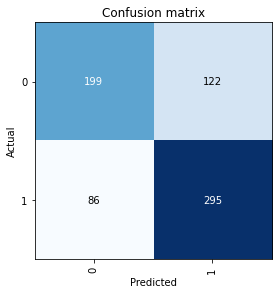

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [92]:
valid = learn.get_preds(ds_type=DatasetType.Valid)


0.7329974811083124

In [58]:
cat.data

0

In [ ]:
res_model = learn.get_preds(ds_type=DatasetType.Valid)
res = res_model[0].numpy()

In [ ]:
res_df = pd.DataFrame({'res':res[:,1], 'path':learn.data.valid_dl.items})
res_df['path'] = res_df['path'].str[2:]
# res_df['class_'] = res_df.path.apply(lambda val: 'NCP' if '_COVID' in val else 'Normal')
# res_df['target'] = res_df['class_'].astype('category').cat.codes
# res_df['hash'] =  res_df.path.apply(lambda val:  val.split('.')[-3])

res_df = pd.merge(res_df, df, on='path')
res_df['target'] = res_df['class_'].astype('category').cat.codes
res_df

In [ ]:
sum(np.round(res_df.res)==res_df.target)/len(res_df)


In [ ]:
np.round(res_df.res)

In [ ]:

i= 0.5
res_df['rank_'] = res_df.groupby('hash').res.rank(method='first', ascending=False)
#res_df_mini = res_df.loc[res_df.rank_<=40]
res_df_mini = res_df.copy()
res_df_mini.sort_values(['hash', 'rank_'])
#res_df_mini = res_df_mini.loc[res_df_mini.class_!='NCP']
tmp = res_df_mini.groupby('hash').agg({'res':['max', 'mean', 'min', 'sum', 'count'],'target':['max' ],  })

tmp.columns=['_'.join(a) for a in tmp.columns]
tmp['res_mean_round'] = np.where(tmp.res_mean>i, 1, 0)
tmp['res_max_round'] =  np.where(tmp.res_max>i, 1, 0)  

tmp.sort_values('res_mean')
tmp['path'] = tmp.index
tmp['class'] = tmp.path.apply(lambda val: 'NCP' if '_COVID' in val else 'Normal')
tmp['res_sum_ex'] = tmp.res_sum/tmp.res_count

xx = sum(tmp.res_mean_round == tmp.target_max )/len(tmp)
xx

In [ ]:
tmp.target_max.value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(tmp.target_max, tmp.res_mean_round )
a

In [ ]:
a.diagonal()/a.sum(1)

In [ ]:
# res_df.shape, yqh.shape

In [ ]:
# yqh = pd.read_csv('/share/data2/yqh/COVID_v3.0/tongji/results.csv')
# yqh.shape

In [ ]:
# yqh = pd.read_csv('/share/data2/yqh/COVID_v4.0/data_new/COVID_cls2.csv')
# yqh.subset.value_counts()